In [5]:
from qiskit import *
import numpy as nm
import math
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
v=nm.arange(0,4,1)
e=[(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]

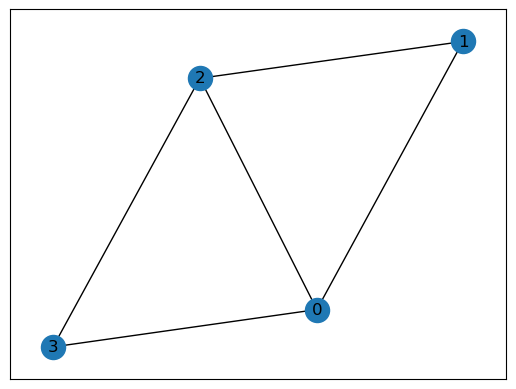

In [7]:

g=nx.Graph()
g.add_nodes_from(v)
g.add_weighted_edges_from(e)
nx.draw_networkx(g)

In [8]:
step=0.05
g=b=nm.arange(0,math.pi,step)
g,b=nm.meshgrid(g,b)

In [9]:
k=3-((nm.sin(2*b)**2)*(nm.sin(2*g)**2)-(0.5*nm.sin(4*b))*(nm.sin(4*g)))*(1+nm.cos(4*g)**2)
res=nm.where(k==nm.amax(k))
a=list(zip(res[0],res[1]))[0]
gam=a[0]*step;
bet=a[1]*step;

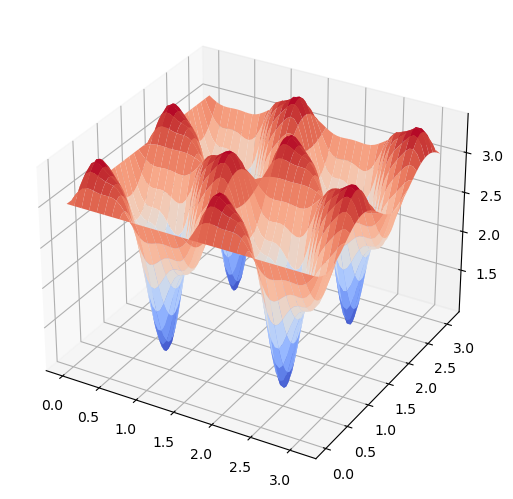

In [10]:
from   matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax  = fig.gca(projection='3d')
ax = fig.add_axes(Axes3D(fig))
surf = ax.plot_surface(g,b,k,cmap=cm.coolwarm,linewidth=0,antialiased=True)
plt.show()

In [11]:
pi=math.pi

In [12]:
q=QuantumRegister(len(v))
c=ClassicalRegister(len(v))
qc=QuantumCircuit(q,c)

In [13]:
for i in range(len(v)):
  qc.u(pi/2,0,pi,q[i])

qc.barrier()

In [11]:
for i in e:
    k = i[0]
    l = i[1]
    qc.u(0,0,-gam,q[l])
    qc.cx(q[l],q[k])
    qc.u(0,0,gam,q[k])
    qc.cx(q[l],q[k])
    qc.u(0,0,-gam,q[k])
    qc.u(0,0,gam, k)
    qc.u(0,0,gam, l)

In [12]:
qc.barrier()
for i in range(len(v)):
  qc.u(2*bet,3*pi/2,pi/2,q[i])
qc.barrier()

In [17]:
q[1]

Qubit(QuantumRegister(4, 'q0'), 1)

In [13]:
for i in range(len(v)):
  qc.measure(q[i],c[i])

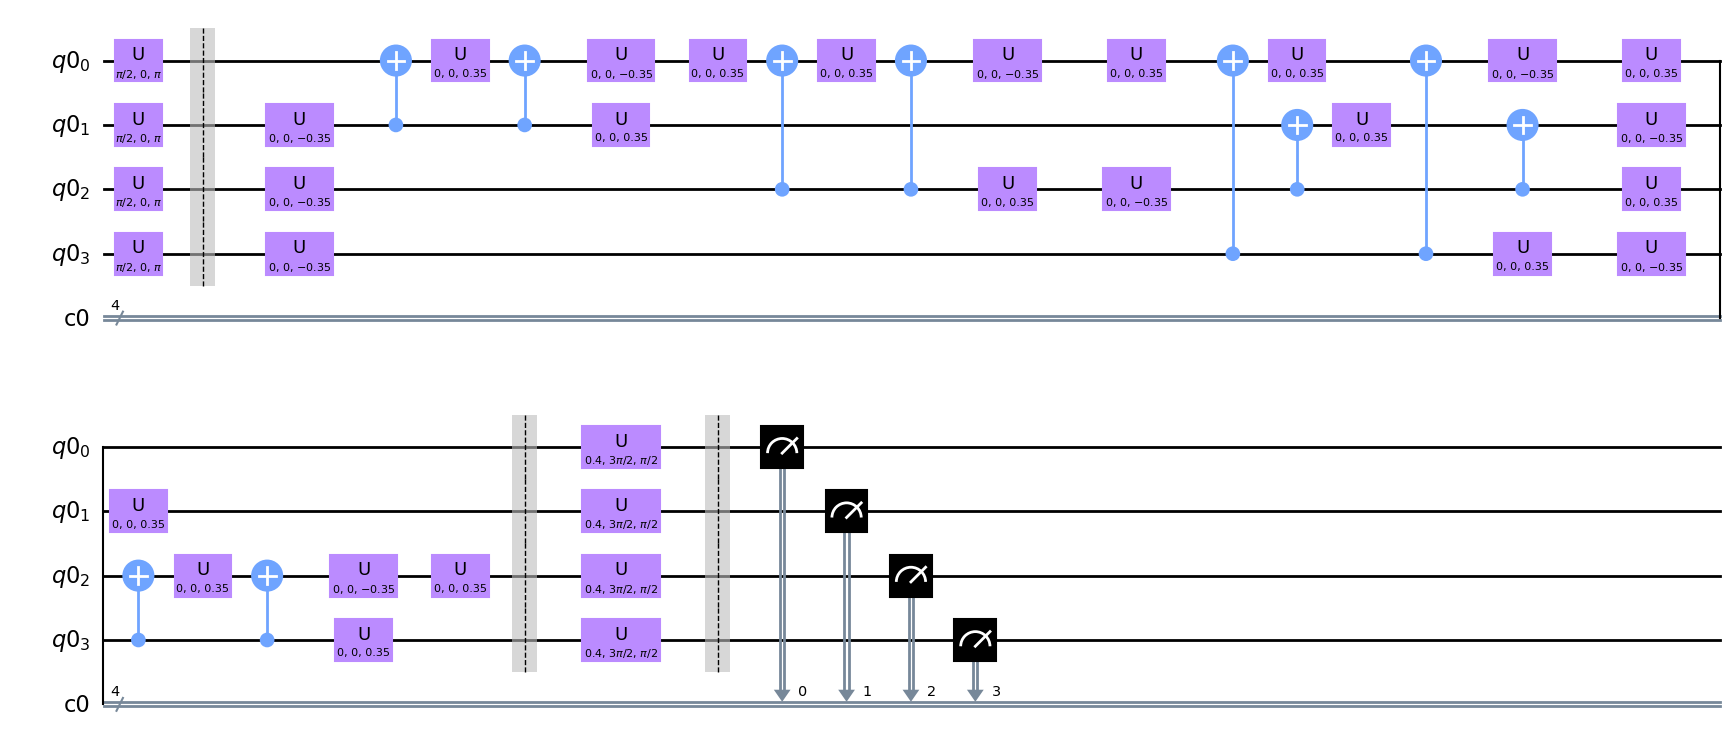

In [14]:
qc.draw(output="mpl")

In [15]:
qc

In [64]:
sim = Aer.get_backend('qasm_simulator')
res=execute(qc, backend=sim).result() 

In [65]:
res.get_counts()

{'1111': 177,
 '0010': 73,
 '1100': 55,
 '1001': 49,
 '1101': 59,
 '0100': 32,
 '0111': 85,
 '1110': 45,
 '0000': 143,
 '1011': 42,
 '0110': 65,
 '0011': 47,
 '1000': 66,
 '1010': 19,
 '0101': 24,
 '0001': 43}

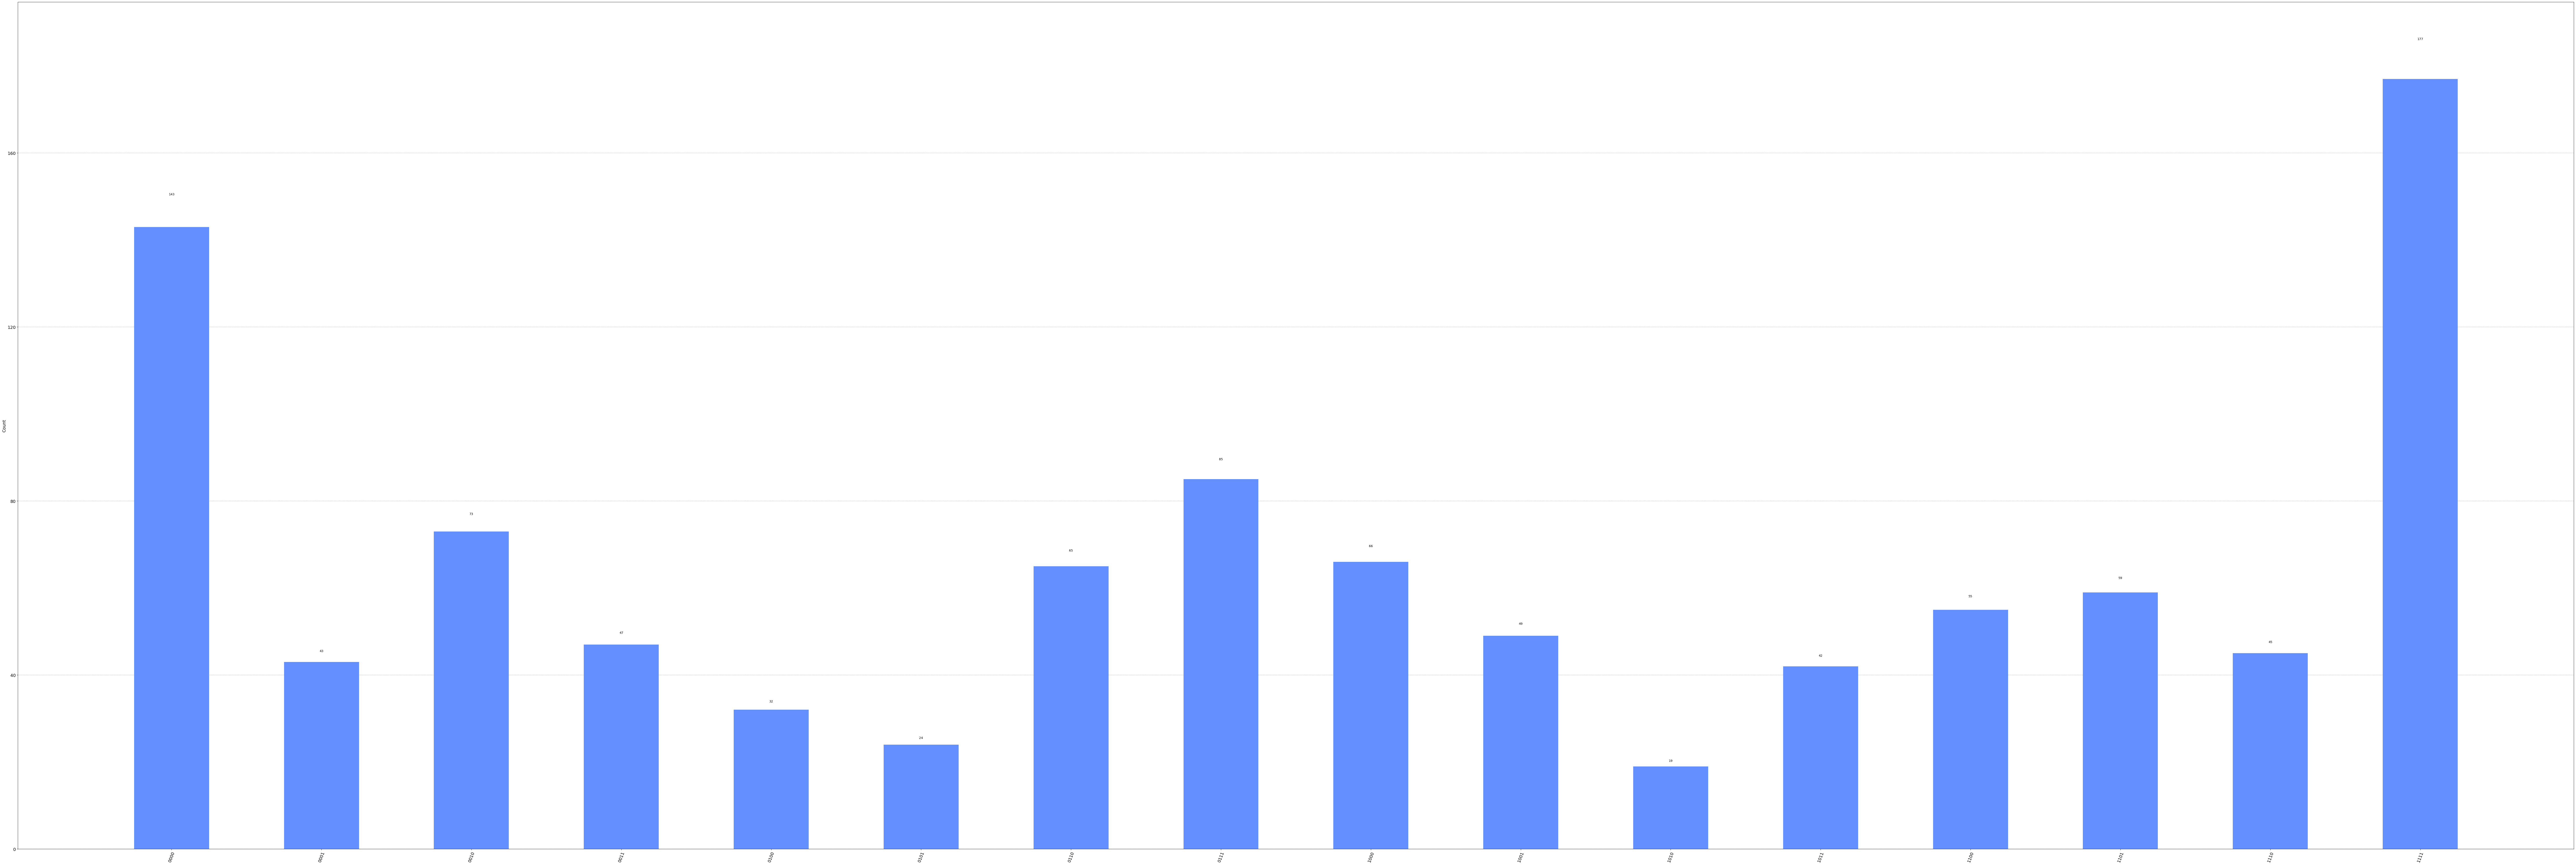

In [66]:
from qiskit.visualization import plot_histogram as ph
ph(res.get_counts(qc),figsize=(150,50))